In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Warming up with decision trees

In [2]:
from sklearn.datasets import make_blobs

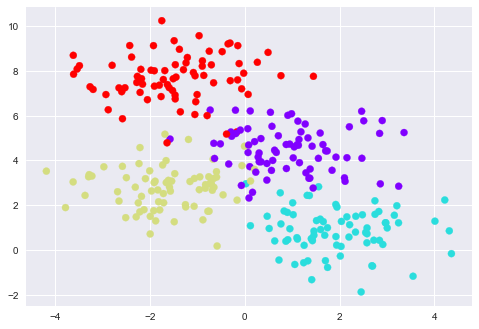

In [6]:
X, Y = make_blobs( n_samples = 300, centers = 4, random_state = 0, cluster_std = 1.0)
plt.scatter( X[:,0], X[:,1], c = Y, s =50, cmap = 'rainbow' );

#### Function to visualize how the tree splits the surface

In [12]:
def visualize_classifier( model, x, y, ax = None, cmap = 'rainbow'):
    
    ax = ax or plt.gca()
    
    # plot the training points
    ax.scatter( X[:,0], X[:,1], c =y, s =30, cmap = cmap, clim = (y.min(), y.max()), zorder=3)
    
    ax.axis( 'tight' )
    ax.axis( 'off' )
    ylim = ax.get_ylim()
    xlim = ax.get_xlim()
    
    # fit the estimator
    xx, yy = np.meshgrid( np.linspace( *xlim, num = 200),
                          np.linspace( *ylim, num = 200))
    Z = model.predict( np.c_[ xx.ravel(), yy.ravel()] ).reshape( xx.shape )
    
    # create a color plot with the results
    n_classes = len( np.unique(y) )
    contours = ax.contourf( xx, yy, Z, alpha = 0.3, 
                           levels = np.arange( n_classes + 1) - 0.5,
                           cmap = cmap, clim = (y.min(), y.max()), zorder = 1 )
    
    ax.set( xlim = xlim , ylim = ylim)
    

Build the decision tree model and plot it

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree = DecisionTreeClassifier().fit( X, Y)

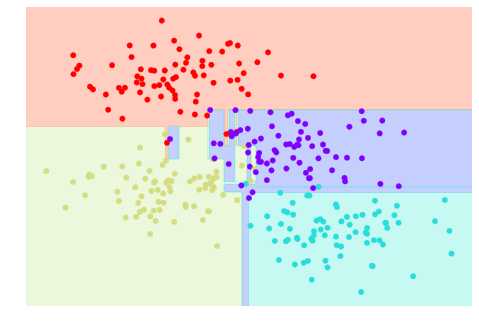

In [13]:
visualize_classifier( tree, X, Y )

### Combining multiple trees:  Bagging and Random Forest

##### Bagging

In [14]:
from sklearn.ensemble import BaggingClassifier

In [20]:
bag = BaggingClassifier( tree, n_estimators = 200, max_samples = 0.8, random_state = 1 )

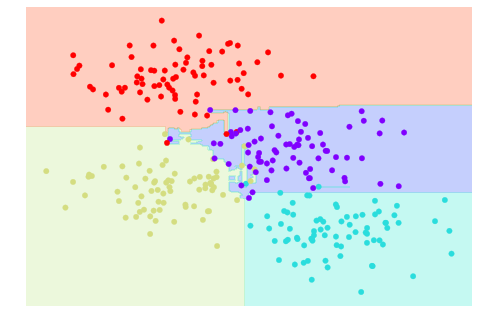

In [21]:
bag.fit(X,Y)
visualize_classifier( bag, X, Y )

##### Random Forests

In [22]:
from sklearn.ensemble import RandomForestClassifier

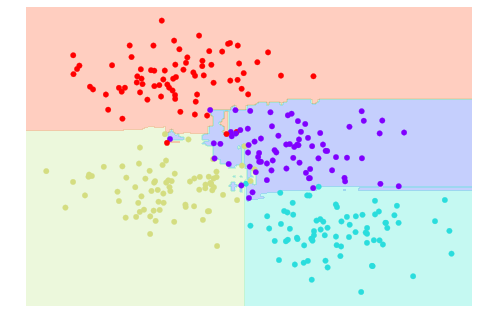

In [23]:
model = RandomForestClassifier( n_estimators = 100, random_state =0 )
model.fit( X, Y )
visualize_classifier( model, X, Y )

The variance of the model is reduced, although is not perfect.

### Random forest regression

Fabricate data:

In [24]:
rng = np.random.RandomState( 42 )
x = 10 * rng.rand( 200 )

In [25]:
def model_data( x, sigma =0.3 ):
    
    fast_oscillation = np.sin( 5 * x )
    slow_oscillation = np.sin( 0.5 * x )
    noise = sigma * rng.rand( len(x) )
    
    return slow_oscillation + fast_oscillation + noise

In [26]:
y = model_data(x)

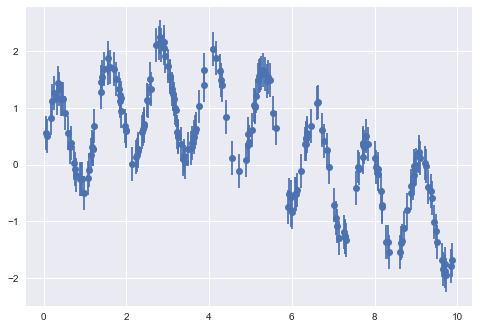

In [28]:
plt.errorbar( x, y, 0.3, fmt='o');

Fit random forest regressor

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [36]:
forest = RandomForestRegressor( 200 )
forest.fit( x[:,np.newaxis] , y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [37]:
xfit = np.linspace( 0, 10, 1000)
yfit = forest.predict( xfit[:, np.newaxis] )
ytrue = model_data( xfit, sigma=0 )

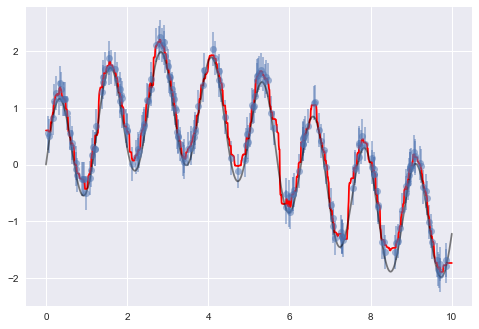

In [39]:
plt.errorbar(x, y, 0.3, fmt='o', alpha = 0.5 )
plt.plot( xfit, yfit, '-r' )
plt.plot( xfit, ytrue, '-k', alpha = 0.5 );

### Example: classifying digits

In [41]:
from sklearn.datasets import load_digits

In [42]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [44]:
from sklearn.model_selection import train_test_split

In [47]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split( digits.data, digits.target, random_state = 0)
model = RandomForestClassifier( n_estimators= 1000 )

In [52]:
model.fit( Xtrain, Ytrain)
ypred = model.predict(Xtest)

Take a look at the result

In [53]:
from sklearn import metrics

In [55]:
print( metrics.classification_report(ypred, Ytest) )

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        38
          1       0.98      0.98      0.98        43
          2       0.95      1.00      0.98        42
          3       0.98      0.96      0.97        46
          4       0.97      1.00      0.99        37
          5       0.98      0.96      0.97        49
          6       1.00      1.00      1.00        52
          7       1.00      0.96      0.98        50
          8       0.94      0.98      0.96        46
          9       0.98      0.98      0.98        47

avg / total       0.98      0.98      0.98       450



In [56]:
from sklearn.metrics import confusion_matrix

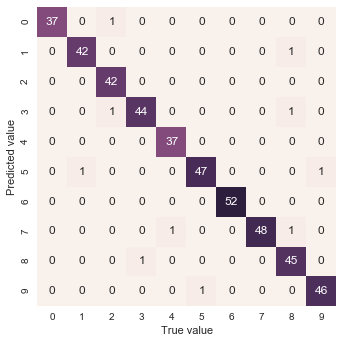

In [58]:
mat = confusion_matrix( Ytest, ypred )
sns.heatmap( mat.T, square=True, annot=True, fmt = 'd', cbar = False )
plt.xlabel( 'True value' )
plt.ylabel( 'Predicted value' );